# Classification on MNIST Fashion data with TensorFlow and different regularization techniques

In [145]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
import pandas as pd

print(tf.__version__)
print(keras.__version__)

2.0.0
2.2.4-tf


In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_train_full.dtype

dtype('uint8')

In [9]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

### Defining class names 

In [10]:
 class_name = ['T-shirt/top', "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [102]:
import numpy as np
indx = np.random.randint(501, size = 500)

## Illustrate some pictures in the MNIST Fashion dataset

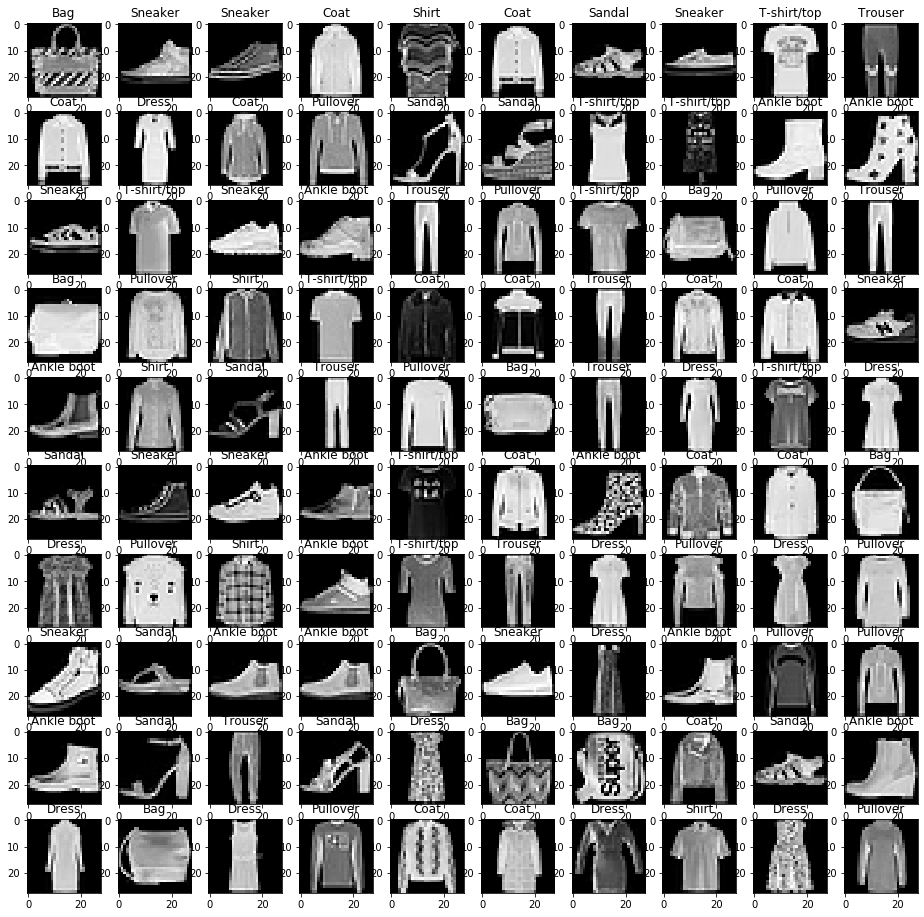

In [109]:
fig, axs = plt.subplots(10, 10)
fig.set_figheight(16)
fig.set_figwidth(16)
i = 0
for r in range(10):
    for c in range(10):
        axs[r, c].imshow(X_train[indx[i]], cmap="gray")
        axs[r, c].set_title(class_name[y_train[indx[i]]])
        #print(class_name[y_train[indx[i]]])
        i+= 1

## Model without regularization

In [156]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, kernel_initializer="he_normal", use_bias = False, activation = "elu"))
model.add(keras.layers.Dense(200, kernel_initializer="he_normal", use_bias = False, activation = "elu"))
model.add(keras.layers.Dense(100, kernel_initializer="he_normal", use_bias = False, activation = "elu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

In [157]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 300)               235200    
_________________________________________________________________
dense_35 (Dense)             (None, 200)               60000     
_________________________________________________________________
dense_36 (Dense)             (None, 100)               20000     
_________________________________________________________________
dense_37 (Dense)             (None, 10)                1010      
Total params: 316,210
Trainable params: 316,210
Non-trainable params: 0
_________________________________________________________________


In [158]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [159]:
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 6s 111us/sample - loss: 0.5901 - accuracy: 0.7942 - val_loss: 0.4436 - val_accuracy: 0.8480
Epoch 2/30
55000/55000 [==============================] - 5s 86us/sample - loss: 0.4433 - accuracy: 0.8419 - val_loss: 0.3964 - val_accuracy: 0.8640
Epoch 3/30
55000/55000 [==============================] - 6s 100us/sample - loss: 0.4046 - accuracy: 0.8553 - val_loss: 0.4121 - val_accuracy: 0.8520
Epoch 4/30
55000/55000 [==============================] - 5s 83us/sample - loss: 0.3814 - accuracy: 0.8639 - val_loss: 0.4020 - val_accuracy: 0.8520
Epoch 5/30
55000/55000 [==============================] - 5s 83us/sample - loss: 0.3653 - accuracy: 0.8683 - val_loss: 0.3700 - val_accuracy: 0.8686
Epoch 6/30
55000/55000 [==============================] - 4s 82us/sample - loss: 0.3511 - accuracy: 0.8739 - val_loss: 0.3718 - val_accuracy: 0.8642
Epoch 7/30
55000/55000 [==============================]

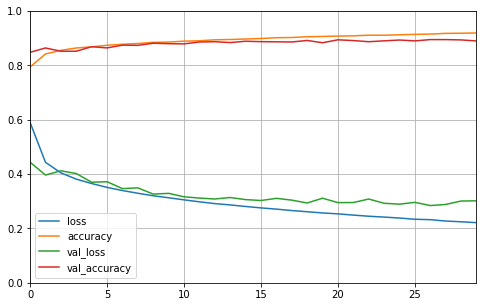

In [160]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## Batch Normalization

In [161]:
model_BN = keras.models.Sequential()
model_BN.add(keras.layers.Flatten(input_shape=[28, 28]))
model_BN.add(keras.layers.BatchNormalization())
model_BN.add(keras.layers.Dense(300, kernel_initializer="he_normal", use_bias = False, activation = "elu"))
model_BN.add(keras.layers.BatchNormalization())
model_BN.add(keras.layers.Dense(200, kernel_initializer="he_normal", use_bias = False, activation = "elu"))
model_BN.add(keras.layers.BatchNormalization())
model_BN.add(keras.layers.Dense(100, kernel_initializer="he_normal", use_bias = False, activation = "elu"))
model_BN.add(keras.layers.BatchNormalization())
model_BN.add(keras.layers.Dense(10, activation = "softmax"))

In [162]:
model_BN.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 784)               0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 784)               3136      
_________________________________________________________________
dense_38 (Dense)             (None, 300)               235200    
_________________________________________________________________
batch_normalization_13 (Batc (None, 300)               1200      
_________________________________________________________________
dense_39 (Dense)             (None, 200)               60000     
_________________________________________________________________
batch_normalization_14 (Batc (None, 200)               800       
_________________________________________________________________
dense_40 (Dense)             (None, 100)             

In [163]:
model_BN.compile(loss = "sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [164]:
history_BN = model_BN.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 8s 153us/sample - loss: 0.5396 - accuracy: 0.8098 - val_loss: 0.3869 - val_accuracy: 0.8630
Epoch 2/30
55000/55000 [==============================] - 7s 136us/sample - loss: 0.4136 - accuracy: 0.8524 - val_loss: 0.3569 - val_accuracy: 0.8712
Epoch 3/30
55000/55000 [==============================] - 8s 139us/sample - loss: 0.3707 - accuracy: 0.8671 - val_loss: 0.3370 - val_accuracy: 0.8752 - loss: 0.3715 - 
Epoch 4/30
55000/55000 [==============================] - 8s 136us/sample - loss: 0.3486 - accuracy: 0.8749 - val_loss: 0.3246 - val_accuracy: 0.8790
Epoch 5/30
55000/55000 [==============================] - 8s 137us/sample - loss: 0.3264 - accuracy: 0.8812 - val_loss: 0.3223 - val_accuracy: 0.8834
Epoch 6/30
55000/55000 [==============================] - 8s 145us/sample - loss: 0.3103 - accuracy: 0.8872 - val_loss: 0.3173 - val_accuracy: 0.8864
Epoch 7/30
55000/55000 [=========

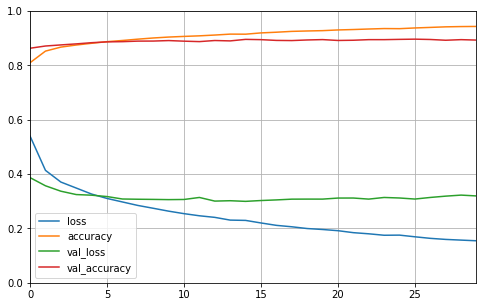

In [165]:
pd.DataFrame(history_BN.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## Dropout

In [166]:
model_dropout = keras.models.Sequential()
model_dropout.add(keras.layers.Flatten(input_shape=[28, 28]))
model_dropout.add(keras.layers.Dropout(rate=0.2))
model_dropout.add(keras.layers.Dense(300, kernel_initializer="he_normal", use_bias = False, activation = "elu"))
model_dropout.add(keras.layers.Dropout(rate=0.2))
model_dropout.add(keras.layers.Dense(200, kernel_initializer="he_normal", use_bias = False, activation = "elu"))
model_dropout.add(keras.layers.Dropout(rate=0.2))
model_dropout.add(keras.layers.Dense(100, kernel_initializer="he_normal", use_bias = False, activation = "elu"))
model_dropout.add(keras.layers.Dropout(rate=0.2))
model_dropout.add(keras.layers.Dense(10, activation = "softmax"))

In [167]:
model_dropout.compile(loss = "sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [168]:
model_dropout.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_16 (Flatten)         (None, 784)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 784)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 300)               235200    
_________________________________________________________________
dropout_11 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 200)               60000     
_________________________________________________________________
dropout_12 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 100)             

In [169]:
history_dropout = model_dropout.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 7s 124us/sample - loss: 0.8000 - accuracy: 0.7052 - val_loss: 0.5050 - val_accuracy: 0.8204
Epoch 2/30
55000/55000 [==============================] - 6s 108us/sample - loss: 0.5997 - accuracy: 0.7818 - val_loss: 0.4599 - val_accuracy: 0.8406
Epoch 3/30
55000/55000 [==============================] - 5s 93us/sample - loss: 0.5534 - accuracy: 0.7981 - val_loss: 0.4388 - val_accuracy: 0.8452
Epoch 4/30
55000/55000 [==============================] - 5s 95us/sample - loss: 0.5249 - accuracy: 0.8095 - val_loss: 0.4227 - val_accuracy: 0.8500
Epoch 5/30
55000/55000 [==============================] - 5s 95us/sample - loss: 0.5082 - accuracy: 0.8145 - val_loss: 0.4086 - val_accuracy: 0.8532
Epoch 6/30
55000/55000 [==============================] - 6s 104us/sample - loss: 0.4917 - accuracy: 0.8207 - val_loss: 0.3998 - val_accuracy: 0.8566
Epoch 7/30
55000/55000 [==============================

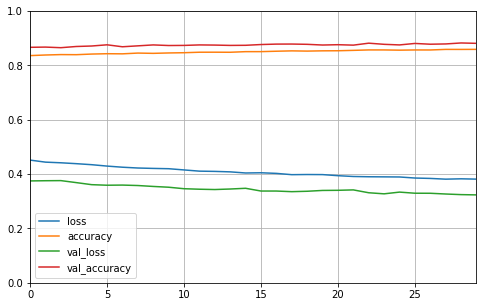

In [132]:
pd.DataFrame(history_dropout.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## $\ell_2$ Regularization

In [178]:
model_l2 = keras.models.Sequential()
model_l2.add(keras.layers.Flatten(input_shape=[28, 28]))
model_l2.add(keras.layers.Dense(300, kernel_initializer="he_normal", 
                                     use_bias = False, 
                                     activation = "elu",
                                     kernel_regularizer = keras.regularizers.l2(0.01)))
model_l2.add(keras.layers.Dense(200, kernel_initializer="he_normal", 
                                     use_bias = False, 
                                     activation = "elu",
                                    kernel_regularizer = keras.regularizers.l2(0.01)))
model_l2.add(keras.layers.Dense(100, kernel_initializer="he_normal", 
                                     use_bias = False, 
                                     activation = "elu",
                                    kernel_regularizer = keras.regularizers.l2(0.01)))
model_l2.add(keras.layers.Dense(10, activation = "softmax"))

In [179]:
model_l2.compile(loss = "sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [180]:
model_l2.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_18 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 300)               235200    
_________________________________________________________________
dense_51 (Dense)             (None, 200)               60000     
_________________________________________________________________
dense_52 (Dense)             (None, 100)               20000     
_________________________________________________________________
dense_53 (Dense)             (None, 10)                1010      
Total params: 316,210
Trainable params: 316,210
Non-trainable params: 0
_________________________________________________________________


In [181]:
model_l2 = model_dropout.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 6s 107us/sample - loss: 0.3507 - accuracy: 0.8686 - val_loss: 0.3010 - val_accuracy: 0.8882
Epoch 2/30
55000/55000 [==============================] - 6s 102us/sample - loss: 0.3506 - accuracy: 0.8695 - val_loss: 0.3025 - val_accuracy: 0.8870
Epoch 3/30
55000/55000 [==============================] - 6s 102us/sample - loss: 0.3504 - accuracy: 0.8681 - val_loss: 0.3050 - val_accuracy: 0.8866
Epoch 4/30
55000/55000 [==============================] - 6s 107us/sample - loss: 0.3484 - accuracy: 0.8698 - val_loss: 0.3003 - val_accuracy: 0.8874
Epoch 5/30
55000/55000 [==============================] - 6s 111us/sample - loss: 0.3520 - accuracy: 0.8703 - val_loss: 0.2996 - val_accuracy: 0.8898
Epoch 6/30
55000/55000 [==============================] - 6s 105us/sample - loss: 0.3500 - accuracy: 0.8685 - val_loss: 0.2986 - val_accuracy: 0.8876
Epoch 7/30
55000/55000 [===========================

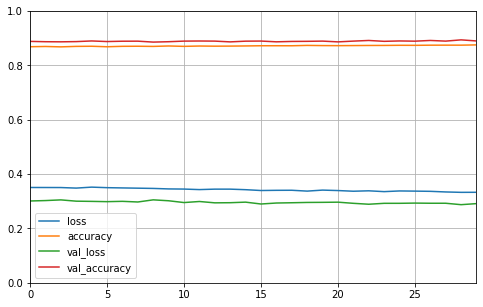

In [182]:
pd.DataFrame(model_l2.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()